# Plane Crash Analysis
*Executive Summary - Capstone Part 04 *
### Submitted by Roshan Lulu
https://roshanlulu.github.io/
___



<img src="./assets/images/runway.gif"/>
___




# Table of Contents<a id='toc'></a>
1. [Introduction](#intro)
2. [Data Sources](#datasource)
3. [Data Scrapping](#datascrapping)
4. [Exploratory Data Analysis](#eda)
    - [EDA Summary/Feature Selection](#examine)
    - [Data Dictionary](#datadict)
5. [Feature Engineering](#featureeng)
    - [Feature engineering - Latitude and Longitude](#latlon)
    - [Feature Engineering - Continent](#continent)
    - [Feature Engineering - Weather, Hemisphere](#weather)
6. [Map Visualization](#mapviz)
7. [Data Insights/Tableau](#insights)
8. [Classifying common causes of plane crashes - NLP](#nlp)
9. [Locations with high density of crashes - Clustering](#clustering)
10. [Summary, Recommendation, Future Steps](#summary)

# 1. Introduction<a id='intro'></a>
[Go back to table of contents](#toc)

In my capstone project I will be analysing the various aviation accidents that have occurred over the past few decades. Various data-science techniques such as data scrapping, data munging, machine learning, nlp will be employed thoughout this project. 

Time and again we have heard disheartening stories of flight crashes around the world, particularly with increased frequency in the recent years. Flights are now very affordable and a common mode of transportation. It is of interest to analyse the accidents. 

Some of the questions that I plan to answer during the course of this project are listed below:
1. What have been the major causes of accidents?
    - Weather, Human error, technical faults, airtraffic managment are some of the commonly heard causes in an accident. I am interested to know the major contributor to the cause of accidents. I will be using text analytics to create a classification for the causes.
2. Is there an area that has had a high density of crashes in the past?
    - It is important to know the root cause of an area being susceptible to accidents. Only with proper analysis,  measures can be taken to avoid future accidents. Clustering techniques will be employed to find areas of high density crashes.
   


**Targeted Audience**

The target audience for this project are the **Aviation Safety Authorities** of all the countries.
Due to the inherent dangers in the use of flight vehicles, National Aviation Authorities typically regulate the following critical aspects of aircraft airworthiness and their operation:

- Design of aircraft, engines, airborne equipment and ground-based equipment affecting flight safety
- Conditions of manufacture and test of aircraft and equipment
- Maintenance of aircraft and equipment
- Operation of aircraft and equipment
- Licensing of pilots and maintenance engineers
- Licensing of airports and navigational aids
- Standards for air traffic control
In some countries the national aviation authorities build and operate airports, including non-airside operations such as passenger terminals

**NOTE: This part of my capstone is to explain my project. Each part of this data science project has been done in parts and I will be providing links when each part is explained. These links can be used to go through the code int he notebook. However, I will try to include certain important code segments.**


# 2. Data Source<a id='datasource'></a>
<img src="./assets/images/datasource.jpeg" style="margin: 10px; height: 100px">

[Go back to table of contents](#toc)

**Source:** Plane crash databases from early 19th century till 2017 have been recorded in these websites.

1. http://www.planecrashinfo.com/database.htm
2. https://aviation-safety.net/database/

**Challenge:** The database is not in an easily downloadable csv format or in an SQL database. In order to start my analysis the first challenge was to get the website data into a csv or an SQL database.

**Solution:** Data scrapping techniques were used to extract data from websites and save as usable format.

# 3. Data Scrapping - Scrapy<a id='datascrapping'></a>
<img src="./assets/images/scrapy.png" style="margin: 10px; height: 150px">
[Go back to table of contents](#toc)

Scrapy is a method to extract data from webpages. In my datasource, each data point was present in a different webpage. It is almost an impossible task to go provide the links of all webpages to scrape the data. This is a typical use case when a bot is required. I developed a scrapy bot that would extract the scrapped data across all the data points to a csv file.


**Detailed explanation of how I created the scrapy bot on my blog: **
- https://roshanlulu.github.io/data/science,/scrapy/2017/04/27/crawl-and-scrape.html

**Scrapy bot framework and code can be found in this path in the project**
- (../scrapybot/crawlbot/crawlbot/spiders/) 
- NOTE: A link to the path canno be provided since it is a folder. To get an idea of my scrapping code, the spider code is provided below.

In [4]:
# Code from scrapy spyder file
import scrapy
from scrapy.selector import Selector

class ScrapeToFileSpider(scrapy.Spider):
    name = 'crawl-tofile-xpath'
    start_urls = [
        'http://www.planecrashinfo.com/1920/1920-1.htm'
    ]

    def parse(self, response):
        filename = 'crawl_tofile.csv'
        with open(filename, 'a') as f:
            for column_name, content in zip(response.xpath('//b/text()'), response.xpath('//td/font/text()')):
                f.write(column_name.extract())
                f.write(content.extract())
                f.write('\n')
            f.write('\n\n')
        f.close()

# 4. Exploratory Data Analysis<a id='eda'></a>
<img src="./assets/images/analyse.jpg" style="margin: 10px; height: 150px">
[Go Back to table of contents](#toc)

The detailed Exploratory data analysis with the entire code can be found in these notebooks.

1. [EDA Plane Crash Info Notebook](../part02/capstone-roshan-part2.ipynb)

2. [EDA Aviation.net Notebook](./0.EDA_aviationnet_db.ipynb)

Due to the large no of featues to be analysed, a link to the notebook with the detailed code is much readable than pasting the code in this notebook.


## EDA Summary/Feature Selection<a id='examine'></a>
[Go Back to table of contents](#toc)

Categorizing the features during Data munging was helpful to decide the useful features for the project. The features I have retained, extracted or dropped have been described below.

>**Airline details:**
- ['LeasedFrom', 'OperatedBy', 'OperatingFor', 'Operator', 'OnBehalfOf']
There were 5 columns that indicated the operator or the airline. Checking the null counts and description of these columns I decided to merge Operator and Operatingfor into 1 column and drop the other 3
Distinct Operators 2748. This is a lot! But, at this stage I do not want to drop the operators with least counts. Because the crash locations might still be important.
I was interested in the operator with highest accidents.
>![operator](../part03/gen_plots/operator.png)
>**Accident Details**
- 'Nature' - The nature of the flight. The categories were quite dispersed and I was able to group them logically and create lesser groups

>![FlightNature](../part03/gen_plots/nature_of_flight.png)
- 'Type' - I had a look at the famous aircraft manufacturers to ensure that I did not move it to the Others category. All the manufacturers with less than 10 crashes hvebeen grouped as the Others category
The names had o be cleaned to remove the exact mdoel number as I am primarily interested in the manufacturer performance.

>![AircraftType](../part03/gen_plots/AircraftType.png)
- 'FlightNumber' - It is kept as a unique ID
- 'CarrierNumber' - Dropped it!
- 'FirstFlight' - extracted the year that the particular aircraft mentioned was flown the first time.
    I have kept this as it would be a good indicator to calculate age of the airline at the time of the accident.
> ![FirstFlight](../part03/gen_plots/CrashesPerYear.png)
- 'Registration' - Dropped it!  
- 'Number' - Dropped it!
- 'Engines' - Split this feature into No of engines and Engine Count
![EngineType](../part03/gen_plots/EngineType.png)

> **Fatalities**
- ['Crew','Passengers','CollisionCasualties','TotalFatalities','GroundCasualities'] 
- These features were converted to integer datatype and renamed. It is a good feature for visualizing and modelling at a later stage.
>![FirstFlight](../part03/gen_plots/PassengerFatal.png)
> **Crash Details**
- 'CrashSiteElevation' - This provides the elevation at which crashes occured. I have cleaned the feature and retained it.
- 'Phase' - The phase during which the accident occured is mentioned here. It is quite an interesting aspect.
![AccidentByPhase](../part03/gen_plots/AccidentByPhase.png)
- 'TotalAirFrameHrs','Duration' - Drop it
- 'Date' - Split into Day, Date, Month, year
![AircraftDamage](../part03/gen_plots/YearCountCloud.png)
- 'Narrative' - Kept to be analysed later
- 'DepartureAirport' - I have not decided what to do with this column. But Ill keep it
- 'DestinationAirport'- I have not decided what to do with this column. But Ill keep it
- 'AirplaneDamage' - Describes the damage to the airplane after the incident.
- 'AirplaneFate' - Described the fate of the airplane after the accident
![AircraftDamage](../part03/gen_plots/AircraftDamageCount.png)
- 'Time' - Time of the accident
- 'Cycles' - Drop it
- 'Location' - Accident Location. Extracted it into Sublocation(Exact Location) and Location(Country names)
> **Investigation Results** 
- I am not sure if this category is useful. But I'll keep the features with more valid values values. It can be dropped later if it is not used.
- 'InvestigatingAgency' - Keep it
- 'Status' - Kept it
- 'Released' - Drop it
- 'DownloadReport' - Drop it
- 'Issued' - Drop it
- 'DurationOfInvestigation' - Keep it


## Data Dictionary<a id='datadict'></a>
<img src="./assets/images/dictionary.jpeg" style="margin: 10px; height: 100px">
[Go Back to table of contents](#toc)

In [ ]:
data_dict = {'Narrative': {
        'type':data.Narrative.dtype,
        'description':'Narrative of the incident'
        },
        'FlightNumber': {
        'type':data.FlightNumber.dtype,
        'description':'Unique ID'
        }, 
        'InvestigatingAgency': {
        'type':data.InvestigatingAgency.dtype,
        'description':'Investigating agency '
        }, 
        'Status': {
        'type':data.Status.dtype,
        'description':'Investigation status'
        },
        'AirplaneDamage': {
        'type':data.AirplaneDamage.dtype,
        'description':'How badly was the Airplane damaged'
        }, 
        'Phase': {
        'type':data.Phase.dtype,
        'description':'Phase of the flight'
        }, 
        'DestinationAirport': {
        'type':data.DestinationAirport.dtype,
        'description':'Destination Airport'
        }, 
        'Date': {
        'type':data.Date.dtype,
        'description':'Date of the month of the incident'
        },
        'Time': {
        'type':data.Time.dtype,
        'description':'Time of the incident'
        }, 
        'DepartureAirport': {
        'type':data.DepartureAirport.dtype,
        'description':'Departure Airport'
        }, 
        'Operator': {
        'type':data.Operator.dtype,
        'description':'Airline/Operator of the flight'
        }, 
        'DurationOfInvestigation': {
        'type':data.DurationOfInvestigation.dtype,
        'description':'Duration length of the accident investigation'
        },
        'AirplaneFate': {
        'type':data.AirplaneFate.dtype,
        'description':'Fate of the airplane after the incident'
        }, 
        'FirstFlight': {
        'type':data.FirstFlight.dtype,
        'description':'First time the flight flew(years)'
        },
        'Nature_Code': {
        'type':data.Nature_Code.dtype,
        'description':'Nature of the flight'
        }, 
        'Type_Code': {
        'type':data.Type_Code.dtype,
        'description':'Aircraft Type/Manufacturer'
        },
        'Engine_Type': {
        'type':data.Engine_Type.dtype,
        'description':'Engine Type of the aircraft'
        },
        'Engine_count': {
        'type':data.Engine_count.dtype,
        'description':'Engine Count of the aircraft'
        }, 
        'Crew_Fatal': {
        'type':data.Crew_Fatal.dtype,
        'description':'Crew Fatality count'
        }, 
        'Crew_Occ': {
        'type':data.Crew_Occ.dtype,
        'description':'Crew Occupant count'
        }, 
        'Total_Fatal': {
        'type':data.Total_Fatal.dtype,
        'description':'Total Fatality count'
        },
        'Total_Occ': {
        'type':data.Total_Occ.dtype,
        'description':'Total Occupant count'
        }, 
        'Psngr_Fatal': {
        'type':data.Psngr_Fatal.dtype,
        'description':'Passenger Fatality count'
        },
        'Psngr_Occ': {
        'type':data.Psngr_Occ.dtype,
        'description':'Passenger occupant count'
        }, 
        'GndFatal': {
        'type':data.GndFatal.dtype,
        'description':'Ground Fatality count'
        }, 
        'Coll_Fatal': {
        'type':data.Coll_Fatal.dtype,
        'description':'Collission Fatality count'
        },
        'Crash_Elev_m': {
        'type':data.Crash_Elev_m.dtype,
        'description':'Elevation in metres at which the accident occured'
        }, 
        'Day': {
        'type':data.Day.dtype,
        'description':'WeekDay of the Incident'
        }, 
        'Month': {
        'type':data.Month.dtype,
        'description':'Month of the incident'
        }, 
        'Year': {
        'type':data.Year.dtype,
        'description':'Year of the incident'
        }, 
        'Dep_Airport_1': {
        'type':data.Dep_Airport_1.dtype,
        'description':'Airport Code of the Departure Airport'
        },
        'Dest_Airport_1': {
        'type':data.Dest_Airport_1.dtype,
        'description':'Airport Code of the Destination Airport'
        }, 
        'SubLocation': {
        'type':data.SubLocation.dtype,
        'description':'The exact location of the incident'
        }, 
        'Country': {
        'type':data.Country.dtype,
        'description':'Country in which the incident occured'
        },
        'Age': {
        'type':data.Age.dtype,
        'description':'Age of the flight at the time of the crash'
        },
    }

# 5. Feature Engineering<a id='featureeng'></a>
<img src="./assets/images/workflow.png" style="margin: 10px;">
[Go Back to table of contents](#toc)

>## Feature engineering - Latitude and Longitude<a id='latlon'></a>
<img src="./assets/images/latlon.png" style="float: left; margin: 20px; height: 70px">
<img src="./assets/images/geocode.jpg" style="float: right; margin: 20px; height: 70px">
> ** Latitude Longitude Extraction**
- From the features above we get features required from the dataset. The Insights from this data is very very interesting. In order to analyse density of aircrashes in an area, I would require the latitude and longitude information of the locations. I 
- The **Google Geocode Api** was used to extract Latitude Longitudes from the Locations. 
> 
**Steps**
- Get a API key from Google geocoder website: https://developers.google.com/maps/documentation/geocoding/intro
- This key is provided by google to allow developers to push 2500 requests to google apis in 24 hours.
- Provide a location, google returns the geospatial coordications a.k.a the latitude longitude of the location
- Provide a geospatial coordinate google will api will return the location and country details.
- This information was very crucial to proceed with my project
- Provide the location details to the api and save the details into an sql database and csv file.
- The country names and location names provide din the database were very messy. It required loads of cleaning to get the data into usable format. 
- Regular expressions were very useful for the text cleaning purpose.
### Below is a Code extract from  [EDA Aviation.net Notebook](../part03/eda_aviationnet_db.ipynb) that was used to extract the geocode.
- Note: It is not advisable to push request using google api s when the information is already available.

In [ ]:
from geopy.geocoders import GoogleV3
from geotext import GeoText
from geopy.exc import GeocoderTimedOut
import time
import pandas as pd

geolocator = GoogleV3(api_key="api key from google geocoder")

data = pd.read_csv('./crashes_geolocation_3.csv')

data.head()

# geoloc_default = geolocator.reverse("0, 0")

crash_loc = pd.DataFrame()
crash_loc['SubLocation'] = data['SubLocation']
crash_loc['Country'] = data['Country']
crash_loc['latlon'] = data['latlon']
crash_loc['place'] = data['place']
crash_loc['sub_latlon'] = data['sub_latlon']
crash_loc['sub_place'] = data['sub_place']
crash_loc['FlighNumber'] = primaryid_flightnum

crash_loc['sub_latlon'].fillna('', inplace = True)
crash_loc['sub_place'].fillna('', inplace = True)

crash_loc.head()

import re

def clean_it(subloc):
    print(subloc)
    if(type(subloc) == str):   
        if 'Station' in subloc:
            head, sep, tail = subloc.partition('Station')
            subloc = head+sep
        if 'Airport' in subloc:
            head, sep, tail = subloc.partition('Airport')
        if 'off ' in subloc:
            head, sep, tail = subloc.partition('off ')
            subloc = tail
        if 'of ' in subloc:
            head, sep, tail = subloc.partition('of ')
            subloc = tail
        if 'from ' in subloc:
            head, sep, tail = subloc.partition('from ')
            subloc = tail
        if '),' in subloc:
            head, sep, tail = subloc.partition('),')
            subloc = head
        if ', ' in subloc:
            head, sep, tail = subloc.partition(', ')
            subloc = head
        if 'RAF Station' in subloc:
            head, sep, tail = subloc.partition(' RAF Station')
            subloc = head
        if 'HanchungHanzhong' in subloc:
            subloc = 'Hanchung, Hanzhong'
        if 'St. Eustatius and Trinidad' in subloc:
            subloc = 'Trinidad'
        if 'GrisonsGraubünden' in subloc:
            subloc = 'Grisons, Graubünden'
        if 'NagyváradOradea' in subloc:
            subloc = 'Nagyvárad, Oradea'
        if 'BushehrBushire' in subloc:
            subloc = 'Bushehr, Bushire'
        if 'KampeneCongo' in subloc:
            subloc = 'Kampene, Congo'
        if 'ManiamunaCongo' in subloc:
            subloc = 'Maniamuna, Congo'
        if 'Cerro' in subloc:
            subloc = 'Cerro de Pasco, Peru'
        if 'TendrovskayaOchakov' in subloc:
            subloc = 'Ochakov'
        if '14 km8.8 mls WNW Campbeltown Machrihanish' in subloc:
            subloc = 'Campbeltown'
        if 'Leningrad' in subloc:
            subloc = 'Leningrad'
        if 'Bagay' in subloc:
            subloc = 'Bagay'
        if 'Congo' in subloc:
            subloc = 'Congo'
        subloc = subloc.replace('-', ' ').replace('near ', '').replace('AAF', '').replace('NAS', '').replace('Airfield', '').replace('Glacier', '').replace('Wells', '')
        subloc = subloc.replace('Mts', '').replace('nr ', ' ').replace('Airstrip', '').replace(')', ' ').replace('SPB', '').replace('AAB', '').replace('Hastings', '')
        subloc = subloc.replace('UVF', '').replace('Army', '').replace('AAB', '').replace('between', '').replace('Putao', '').replace('Field', '').replace('NARTU', '').replace('within ', ' ')
        subloc = subloc.replace('Valley', '').replace('Air Base', ' ').replace('Station', '').replace('Airport', '').replace('Range', '').replace('Seaplane Base', '').replace('lagoon', '')
        print(subloc)
    return subloc

# text = some string

# Clean the sublocation value:
# remove anything after the words airport
# Remove anything before from or off or of
sub_location = []

for index in range(0, len(crash_loc)):
    subloc = crash_loc.ix[index, 'SubLocation']
    if (crash_loc.ix[index, 'sub_latlon'] == ''):
        subloc = clean_it(subloc)
    else:
        pass
    sub_location.append(subloc)


crash_loc['SubLocation'] = sub_location

crash_loc[crash_loc['sub_latlon'] == ''].shape

# There are 981 values
sub_location = []
for index in range(0, len(crash_loc)):
    subloc = crash_loc.ix[index, 'SubLocation']
    if (type(subloc) == str) and ('unknown' in subloc):
        crash_loc.set_value(index, 'sub_latlon', crash_loc.ix[index, 'latlon'])
        crash_loc.set_value(index, 'sub_place', crash_loc.ix[index, 'place'])
    elif (type(subloc) == str) and (']' in subloc):
        crash_loc.set_value(index, 'sub_latlon', crash_loc.ix[index, 'latlon'])
        crash_loc.set_value(index, 'sub_place', crash_loc.ix[index, 'place'])
    elif (type(subloc) == str) and ('Brussels/Evere Advanced Landing Ground B 56' in subloc):
        crash_loc.set_value(index, 'sub_latlon', crash_loc.ix[index, 'latlon'])
        crash_loc.set_value(index, 'sub_place', crash_loc.ix[index, 'place'])
    elif (type(subloc) == str) and ('13 km8.1 mls  ENE Wawona' in subloc):
        crash_loc.set_value(index, 'sub_latlon', crash_loc.ix[index, 'latlon'])
        crash_loc.set_value(index, 'sub_place', crash_loc.ix[index, 'place'])
    else:
        pass
    sub_location.append(subloc)


# crash_loc['SubLocation'] = sub_location

# The cleaning of sublocation was done iteratively. Finally Im left with 200 odd values, which does not give valid information. 
# I am going to use the country names for these ones. and give the latlon details.


sub_location = []
for index in range(0, len(crash_loc)):
    subloc = crash_loc.ix[index, 'sub_place']
    if (subloc == ''):
        crash_loc.set_value(index, 'sub_latlon', crash_loc.ix[index, 'latlon'])
        crash_loc.set_value(index, 'sub_place', crash_loc.ix[index, 'place'])
    else:
        pass

crash_loc[crash_loc['sub_latlon'] == ''].shape

start = 0
stop = 8173
for index in range(start,stop):
    try:
        if crash_loc.ix[index, 'sub_place'] == '':
            print(index)
            # get latlon and place from api
            subloc = crash_loc.ix[index, 'SubLocation']
            place,(lat,lon) = geolocator.geocode(crash_loc.ix[index, 'SubLocation'])
            crash_loc.set_value(index, 'sub_latlon', (lat,lon))
            crash_loc.set_value(index, 'sub_place', place)
            crash_loc.loc[crash_loc['SubLocation'] == subloc, ['sub_latlon', 'sub_place']] = [(lat,lon),place]
        else:
            pass
    except Exception as e:
        print('error', e)

crash_loc.head()

saveit = crash_loc
len(crash_loc[crash_loc['sub_place'] == ''])

# Write save it to a csv file
saveit.to_csv('./crashes_geolocation_3.csv', index = False)

crash_loc[crash_loc['SubLocation'] == '']

> ## ** Feature Engineering - Continent **<a id='continent'></a>
[Go Back to table of contents](#toc)

- Along the project I realized, the data has a lot of segregations when we consider country, airline, aircraft.
- In order to categorize well, I decided to feature engineer the continents and the weather information into my dataset.
The `pycountry_convert` used to convert Country name to Country code. The continent was obtained from the country code

In [ ]:
from pycountry_convert import convert_country_alpha2_to_continent as getcontinent
from pycountry_convert import convert_country_name_to_country_alpha2 as getalpha2
import pycountry

# Write save it to a csv file
data_con = pd.read_csv('./dataset/cleaned_merged_dataset.csv')
data_con.head()

data_con.loc[data_con['Country'] == 'United States of America', ['Country']] = 'United States'
data_con.loc[data_con['Country'] == 'Russia', ['Country']] = 'Russian Federation'
data_con.loc[data_con['Country'] == 'Vietnam', ['Country']] = 'Viet Nam'
data_con.loc[data_con['Country'] == 'Bolivia', ['Country']] = 'Bolivia, Plurinational State of'
data_con.loc[data_con['Country'] == 'Democratic Republic)', ['Country']] = 'Congo, The Democratic Republic of the'
data_con.loc[data_con['Country'] == 'Venezuela', ['Country']] = 'Venezuela, Bolivarian Republic of'
data_con.loc[data_con['Country'] == 'Iran', ['Country']] = 'Iran, Islamic Republic of'
data_con.loc[data_con['Country'] == 'Laos', ['Country']] = "Lao People's Democratic Republic"
data_con.loc[data_con['Country'] == 'Taiwan', ['Country']] = 'Taiwan, Province of China'
data_con.loc[data_con['Country'] == 'Pacific Ocean', ['Country']] = 'Fiji'
data_con.loc[data_con['Country'] == 'South Korea', ['Country']] = "Korea, Democratic People's Republic of"
data_con.loc[data_con['Country'] == 'Tanzania', ['Country']] = 'Tanzania, United Republic of'
data_con.loc[data_con['Country'] == 'Czech Republic', ['Country']] = 'Czechia'
data_con.loc[data_con['Country'] == 'Syria', ['Country']] = 'Syrian Arab Republic'
data_con.loc[data_con['Country'] == "Cote d'Ivoire", ['Country']] = "Côte d'Ivoire"
data_con.loc[data_con['Country'] == "Falkland Islands", ['Country']] = 'Falkland Islands (Malvinas)'
data_con.loc[data_con['Country'] == "U.S. Virgin Islands", ['Country']] = 'Virgin Islands, U.S.'
data_con.loc[data_con['Country'] == "British Virgin Islands", ['Country']] = 'Virgin Islands, British'
data_con.loc[data_con['Country'] == "North Korea", ['Country']] = 'Korea, Republic of'
data_con.loc[data_con['Country'] == "St. Pierre and Miquelon", ['Country']] = 'Saint Pierre and Miquelon'
data_con.loc[data_con['Country'] == "Micronesia", ['Country']] = 'Micronesia, Federated States of'
data_con.loc[data_con['Country'] == "Reunion", ['Country']] = 'Réunion'
data_con.loc[data_con['Country'] == "St. Kitts and Nevis", ['Country']] = 'Saint Kitts and Nevis'
data_con.loc[data_con['Country'] == "East Timor", ['Country']] = 'Timor-Leste'
data_con.loc[data_con['Country'] == "Keeling) Islands", ['Country']] = 'Cocos (Keeling) Islands'
data_con.loc[data_con['Country'] == "Moldova", ['Country']] = 'Moldova, Republic of'
data_con.loc[data_con['Country'] == "U.S. Minor Outlying Islands", ['Country']] = 'United States Minor Outlying Islands'

data_con.loc[data_con['Country'] == 'Indian Ocean', ['Country']] = 'Brazil'
data_con.loc[data_con['Country'] == 'North Pole', ['Country']] = 'Brazil'
data_con.loc[data_con['Country'] == 'Mediterranean Sea', ['Country']] = 'Brazil'
data_con.loc[data_con['Country'] == 'Atlantic Ocean', ['Country']] = 'Brazil'
data_con.loc[data_con['Country'] == 'Unknown country', ['Country']] = 'Brazil'
data_con.loc[data_con['Country'] == "FYROM)", ['Country']] = 'Brazil'
data_con.head()

input_countries = data_con['Country']

continents = []
for country in input_countries:
    try:
        conti = getcontinent(pycountry.countries.get(name = country).alpha_2)
        if conti == 'Oceania':
            conti = 'Australia'
    except Exception as e:
        if country == 'Antarctica':
            conti = 'Antarctica'
        elif country == 'Timor-Leste':
            conti = 'Asia'
        elif country == 'Western Sahara':
            conti = 'Africa'
        elif country == 'United States Minor Outlying Islands':
            conti = 'North America'
        else:
            print('error', country)
    continents.append(conti)

data_con['Continents'] = continents

data_con['Continents'].value_counts()

> ## **Feature Engineering - Weather and Hemisphere**<a id='weather'></a> 
- The weather during which the accidents occured was a good feature to explore. Since it was not present in the database I created a feature based on the continents and the month of the accident.
- Hemispheres were identified with the continet information and saved as a new feature
- Weather was identified based on the Month and the Hemisphere and added as a new feature for analysis

In [ ]:
# Rename the months
data_con.loc[data_con.Month == 'January', ['Month']] = 'JAN'
data_con.loc[data_con.Month == 'February', ['Month']] = 'FEB'
data_con.loc[data_con.Month == 'March', ['Month']] = 'MAR'
data_con.loc[data_con.Month == 'April', ['Month']] = 'APR' 
data_con.loc[data_con.Month == 'May', ['Month']] = 'MAY'
data_con.loc[data_con.Month == 'June', ['Month']] = 'JUN'
data_con.loc[data_con.Month == 'July', ['Month']] = 'JUL'
data_con.loc[data_con.Month == 'August', ['Month']] = 'AUG'
data_con.loc[data_con.Month == 'September', ['Month']] = 'SEP'
data_con.loc[data_con.Month == 'October', ['Month']] = 'OCT'
data_con.loc[data_con.Month == 'November', ['Month']] = 'NOV'
data_con.loc[data_con.Month == 'December', ['Month']] = 'DEC' 

# randomly impute xxx
data_con.loc[data_con.Month == 'xxx', ['Month']] = 'MAY' 

data_con['Hemisphere'] = data_con['Continents']

data_con.loc[data_con.Hemisphere == 'North America', ['Hemisphere']] = 'Northern' 
data_con.loc[data_con.Hemisphere == 'Asia', ['Hemisphere']] = 'Northern' 
data_con.loc[data_con.Hemisphere == 'Europe', ['Hemisphere']] = 'Northern' 
data_con.loc[data_con.Hemisphere == 'Africa', ['Hemisphere']] = 'Southern' 
data_con.loc[data_con.Hemisphere == 'South America', ['Hemisphere']] = 'Southern' 
data_con.loc[data_con.Hemisphere == 'Australia', ['Hemisphere']] = 'Southern' 
data_con.loc[data_con.Hemisphere == 'Antarctica', ['Hemisphere']] = 'Southern' 

# Code to convert hemisphere and month to weather
weather = []
w1 = ['DEC', 'JAN', 'FEB']
w2 = ['MAR', 'APR', 'MAY']
w3 = ['JUN', 'JUL', 'AUG']
w4 = ['SEP', 'OCT', 'NOV']
for i in range(0, len(data_con)):
    hem = data_con.ix[i, 'Hemisphere']
    month = data_con.ix[i, 'Month']
    if (hem == 'Southern' and month in w1) or (hem == 'Northern' and month in w3):
        weather.append('Summer')
    elif (hem == 'Southern' and month in w2) or (hem == 'Northern' and month in w4):
        weather.append('Autumn')
    elif (hem == 'Southern' and month in w3) or (hem == 'Northern' and month in w1):
        weather.append('Winter')
    elif (hem == 'Southern' and month in w4) or (hem == 'Northern' and month in w2):
        weather.append('Spring')
    else:
        print(hem, month)
    

data_con['Seasons'] = weather

# 6. Map Visualization<a id='mapviz'></a>
[Go Back to table of contents](#toc)

The cleaned data points were plotted on the world map to get an idea of the locations with crashes.

<img src="./assets/map/world_heatmap.png">


# Countries affected

<img src="./assets/map/countries_affected.png">



The detailed notebook with the Plotly and folium implementation can be found in this location: [Data Map visualization](./4. Map_viz.ipynb)

# 7. Data Insights/Tableau<a id='insights'></a>
[Go Back to table of contents](#toc)

I have used Tableau to get a better idea of the trends over the years. My Tableau workbook is int he project folder. I have added screenshots from the workbook below.[Tableau Workbook](./Tableau/Aviation_Accidents.twb)

The tableau dashboard published can be found here:
https://public.tableau.com/profile/roshan.lulu#!/vizhome/Aviation_Accident_Analysis/TrendDashboard

<img src="./Tableau/Civil Fatalities by Country.png" style="height: 500px">
<img src="./Tableau/Crash Trend.png" style="height: 500px">
<img src="./Tableau/Fatality Trend.png" style="height: 500px">
<img src="./Tableau/OccupantsFatalities Trend.png" style="height: 400px">
<img src="./Tableau/Trend by Accident Cause.png" style="height: 500px">


# 8. Text Classification<a id='nlp'></a>
[Go Back to table of contents](#toc)

I have been analysing plane accidents from the past century. One aspect of my analysis is the reasons for the accidents. My hypothesis is that the accidents are not always an isolated incident. So in my journey I am trying to identify accidents that have a similar cause.


Aviation accidents can be traced to a variety of causes, including pilot error, air traffic controller error,design and manufacturer defects, maintenance failures, sabotage, or inclement weather, Human error, Maintanence Negligence, Design and Manufacturing, Corporate Negligence and many more. I am interested in analysing the causes of the accidents. 

Dataset: Given my input datasets and its features, the causes are not a feature that was easily available for analysis. Instead, the dataset has a summary/narrative of the incident as a feature. In order to answer my problem statement I am going to use Natural Language Processing techniques. 
- **Libraries used**: Pandas and NLP were used to extract n-gram words that specify the accident reason. Plotting techniques like Wordcloud are used to plot the commonly used words to describe each category
- **Approach**: Use NLTK libraries to train a model that categorizes the reason of each accident base don unstructured text.
- **Challenge**:
    - The causes are not directly available in the dataset.
    - The dataset contains unstructured textual content that describes the cause of the accident.
    - A model always requires an available/training set which will then be used to fit on the unseen or  future data. 
    - Normally, if a label was already available, a train-test split method could be applied to create a model.
    - Work Around: Thanks to google, I was able to read about quite a few causes. I have collected textual information that contains the key words that contribute to categorize the cause. The models will be trained with this text set. The trained model will be applied on the dataset to get the classification.

### PREPROCESS TEXT
> 
- TextBlob is a python natural language processing toolkit that provides text mining, text analysis and text processing modules. The methods used below would be helpful to use in the model
- Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors:

### TOKENIZING
> 
- CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:
- The index value of a word in the vocabulary is linked to its frequency in the whole training corpus.
- Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.
- To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.
- Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.
- This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

### TRAINING CLASSIFIER
> 
- Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

### BUILDING A PIPELINE WITH NAIVE BAYES
> 
- **We have done 3 steps for the classification usecase. It can be made shorter using a pipeline? **
- In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:


### BUILDING A PIPELINE WITH SVM
> 
- Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms (although it’s also a bit slower than naïve Bayes). We can change the learner by just plugging a different classifier object into our pipeline:


- **Detailed notebook can be found in this link:** [NLP on Accident Summary](./2. Common causes of plane crashes - NLP.ipynb)

### Unsupervised Topic Modelling using LDA (Latent Dirichlet Allocation)

> 
I am interested to divide the topics based on the cause of accidents. Hence Clustering them based on the description is the next task. There are many approaches for obtaining topics from a text. 
- Latent Dirichlet Allocation is the most popular topic modeling technique and I am planning to try that first.
-  Term Frequency and Inverse Document Frequency and NonNegative Matrix Factorization techniques are the other topic modelling techniques
> 
**Cleaning and Preprocessing**
- Cleaning is an important step before any text mining task. Since this has already been done above. we wont be looking at it.
> 
**Preparing Document-Term(DT) Matrix**
- All the text documents combined is known as the **corpus**. To run any mathematical model on text corpus, it is a good practice to convert it into a matrix representation. LDA model looks for repeating term patterns in the DT matrix.
> 
**Running LDA Model**
- Next step is to create an object for LDA model. The dataset does not have enough information to divide it into train and test sets. To begin, I will be using the LDA model to come up with similar words to create topics for the incidents. This can also be seen as feature engineering using the model. I expect to see some interesting results with this model.

- **Detailed Notebook on Topic Modelling of the Accident causes can be found here:** [Topic Modelling](./1.Text_analytics_modelling.ipynb)

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(font_scale=1.5)

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


data = pd.read_csv('./dataset/cleaned_merged_dataset.csv')
# Copy data to a new dataframe
txt_data = data[:]

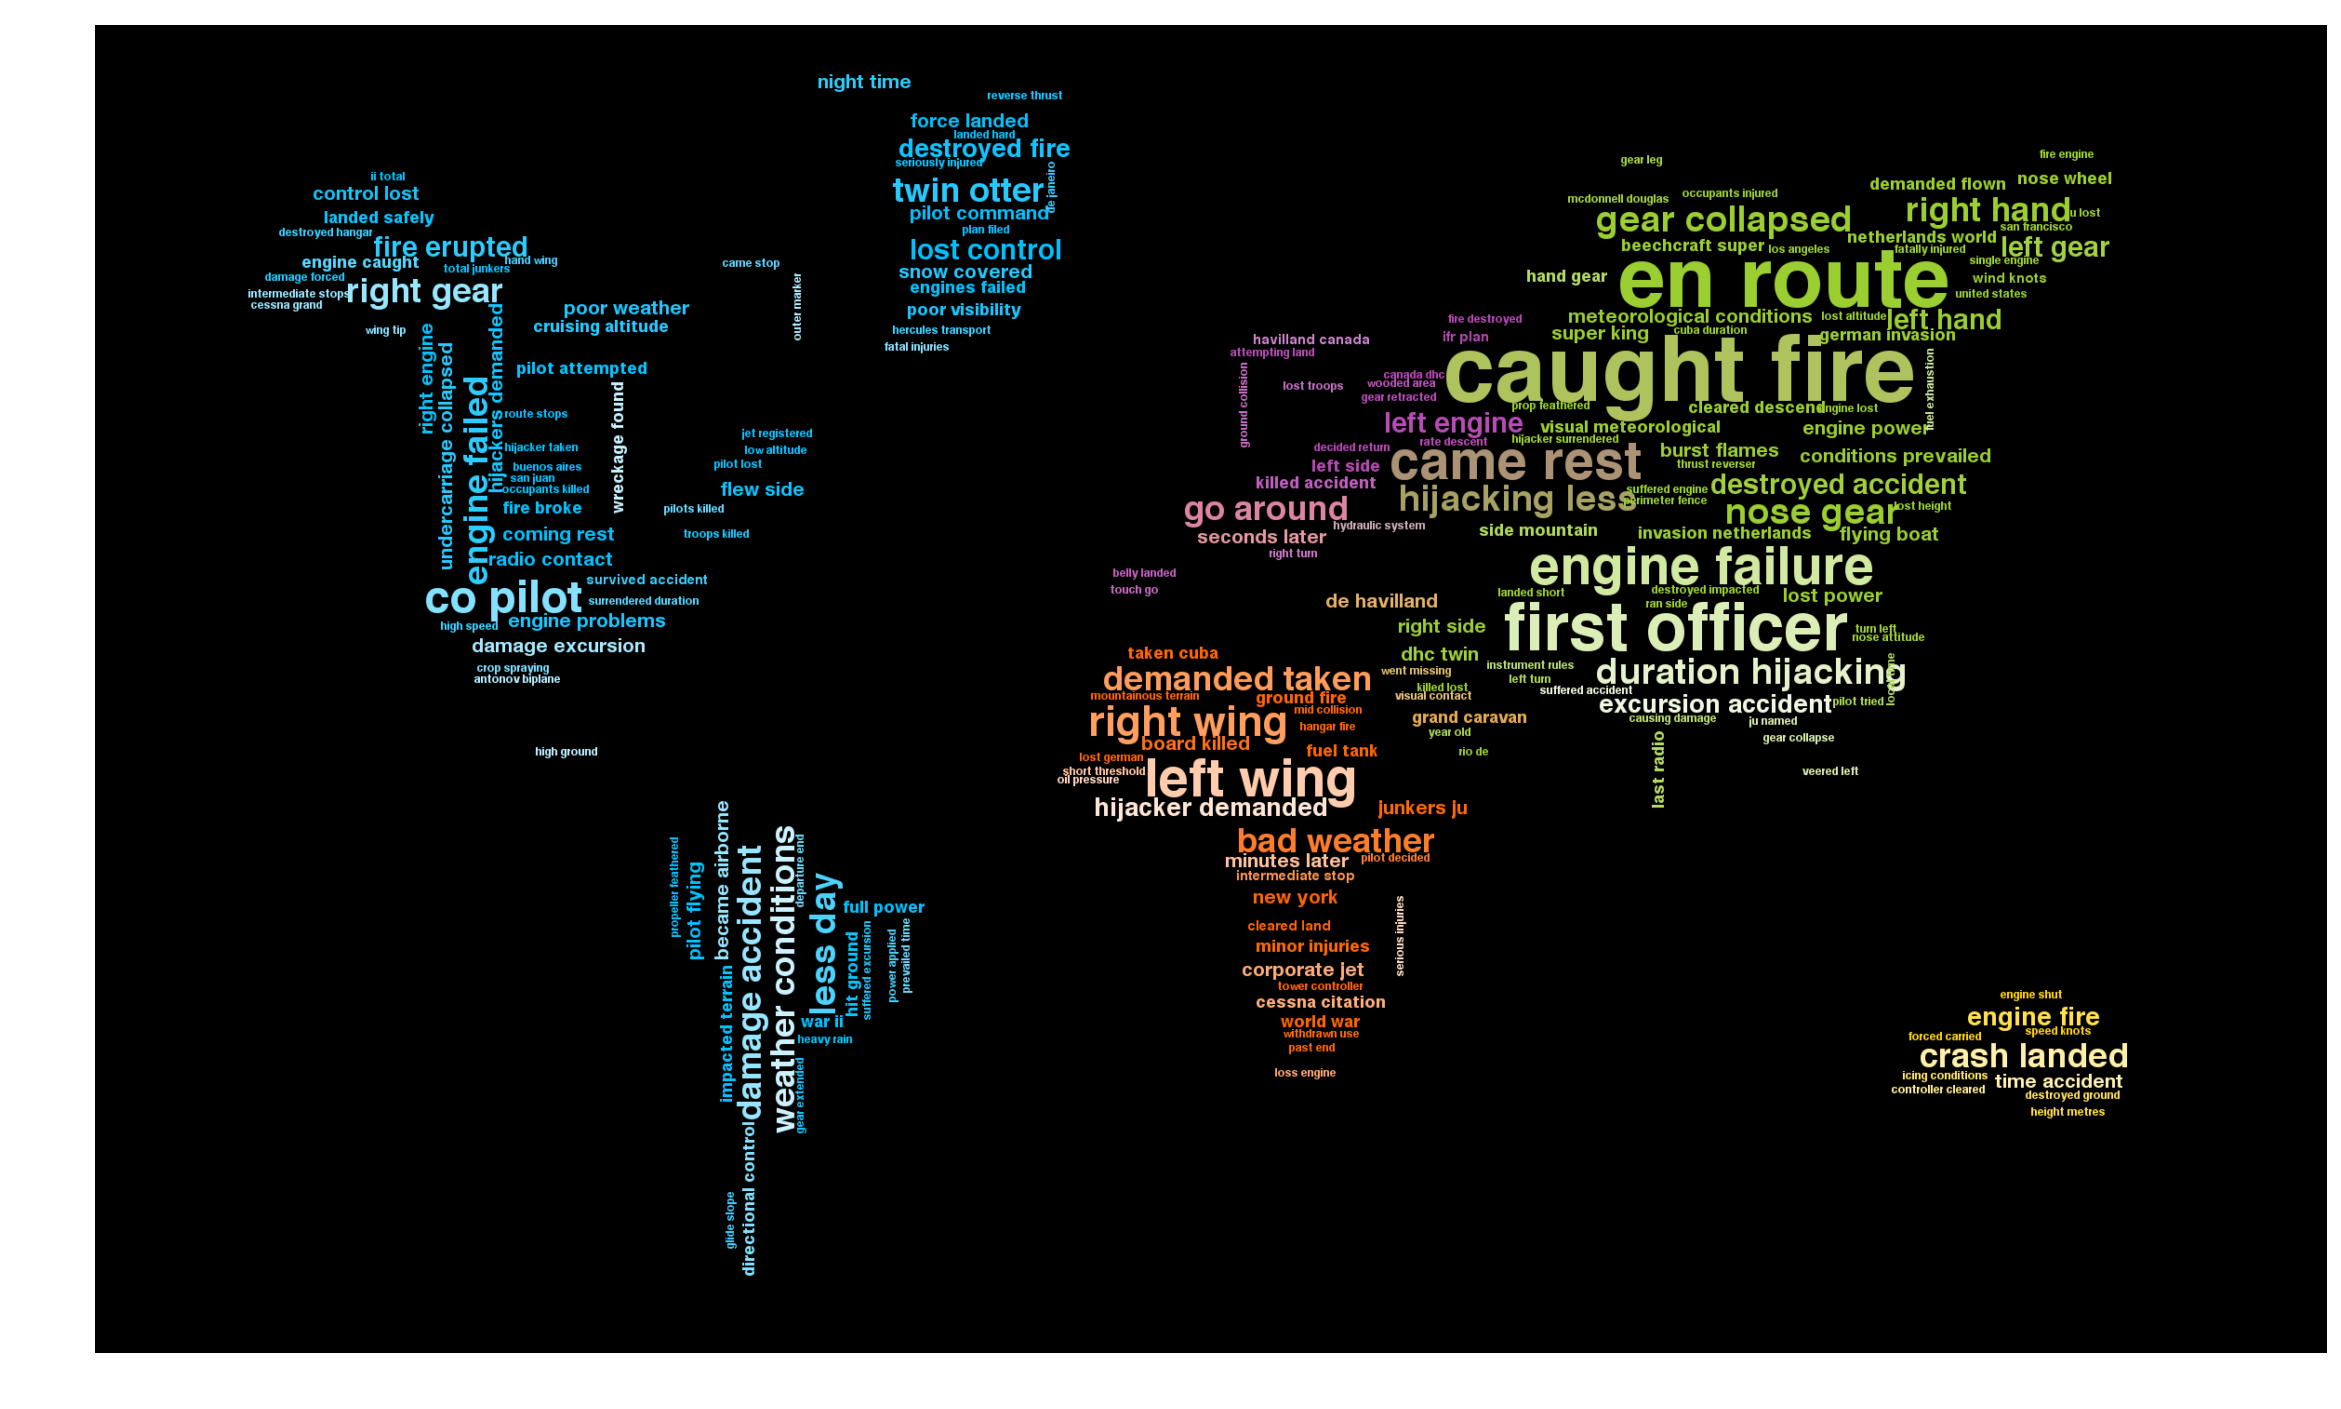

In [6]:
from nltk.corpus import stopwords
from collections import Counter

from 9.preprocess import preprocess_text

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

### CREATE STOP WORDS ( THIS HAS BEEN AN ITERATIVE PROCESS)

# Creating stop words database for all the numbers
stop = stopwords.words('english')
stop += ['00', '000', '01', '02', '03', '04', '04r', '05', '050', '05l', '05r', '06', '06r', '07', '08', '080', '09', '09r', '10', '100', '1000', '10000', '102', '103', '104', '1049', '105', '106', '107', '108', '109', '10deg', '10l', '11', '110', '1100', '111', '111f', '112', '113', '114', '115', '116', '117', '118', '118a', '119', '11f', '11s', '12', '120', '1200', '12000', '121', '361', '376','122', '123', '124', '124c', '125', '128', '129', '12bk', '13', '130', '1300', '130b', '130e', '130h', '130j', '131', '133', '134', '135', '135a', '139', '13l', '14', '140', '1400', '141', '1420', '145', '14500', '146', '148', '15', '150', '1500', '153', '154', '157', '158', '159', '15deg', '16', '160', '1600', '163', '165', '166', '168', '16r', '17', '170', '1700', '172', '175', '1750', '17l', '18', '180', '1800', '180deg', '185', '188', '19', '190', '1900', '1900c', '1900d', '191', '1936', '1938', '1940', '1941', '1942', '1943', '1944', '1945', '1948', '1949', '1950', '1951', '1953', '1954', '1955', '1957', '1963', '1964', '1966', '1968', '1969', '1972', '1973', '1974', '1978', '1979', '1980', '1981', '1982', '1983', '1985', '1986', '1988', '1990', '1991', '1992', '1993', '1994', '1997', '1998', '1999', '19r', '1a', '1a10', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '200c', '201', '2011', '2013', '2015', '202', '203', '2050', '207', '208', '208b', '20deg', '21', '210', '211', '212', '215', '22', '220', '2200', '222', '225', '227', '228', '22l', '23', '230', '2300', '232', '235', '24', '240', '2400', '241', '242', '24b', '24l', '24r', '24rv', '25', '250', '2500', '25l', '26', '260', '265', '266', '26b', '26l', '27', '270', '2700', '27l', '27r', '28', '280', '2800', '285', '28l', '28r', '29', '290', '29l', '2a', '2r', '2t', '30', '300', '3000', '304', '306', '30deg', '31', '310', '31242', '31243', '314', '315', '31l', '31r', '32', '320', '3200', '320o', '322', '325', '328', '32l', '32r', '33', '330', '3300', '330o', '336', '338', '33l', '34', '340', '340b', '340o', '345', '35', '350', '3500', '350o', '35a', '35l', '36', '360', '3600', '37', '38', '39', '390', '3a', '3c', '3deg', '3m', '3mge', '3t', '40', '400', '4000', '41', '410', '410uvp', '42', '420', '4200', '43', '430', '436', '44', '440', '45', '450', '4500', '45deg', '46', '46d', '47', '470', '4700', '47a', '47b', '47d', '47s', '48', '49', '50', '500', '5000', '501', '504', '50832', '50deg', '51', '52', '525', '53', '54', '5400', '55', '550', '5500', '56', '57', '58', '580', '59', '5a', '5h', '5n', '5nm', '5y', '60', '600', '6000', '601', '61', '610', '62', '620', '63', '631', '64', '640', '65', '650', '6500', '66', '67', '68', '6a', '6e', '70', '700', '7000', '707', '71', '710', '72', '720', '725', '727', '73', '737', '74', '747', '748', '75', '750', '7500', '756', '757', '76', '767', '767s', '76md', '770', '777', '78', '78505', '7nm', '80', '800', '8000', '801', '81', '811', '812', '82', '8235', '8241', '82a', '83', '84', '85', '850', '8500', '86', '87', '88', '8807', '89', '8q', '8th', '90', '900', '9000', '90deg', '91', '910', '92', '93', '931', '94', '95', '96', '97', '98', '99', '990', '9k', '9n', '9q', 'a100', 'a300', 'a310', 'a319', 'a320', 'a321', 'a330', 'a6m2', 'aa', 'aaa', 'aab', 'aaf', 'ab', 'ababa']
stop += ['08r', '1009', '101', '1011', '104b', '144', '21st', '221', '22285', '231', '23l', '300yds', '301', '3100', '318', '319', '31de', '321', '321b', '324', '3277', '33666', '33r', '380', '3800', '395', '39a', '3mce', '400a', '402q', '40563', '40deg', '415', '42e', '42w', '4300', '451', '460', '701', '702', '712', '730', '740', '75a', '76td', '7700', '775', '780', '78270', '78462', '785', '797', '800xp', '823', '841', '8as', '8r', '901', '919', '920', '926', '980', '9j', '9l', '9m']
stop += ['675','680','6800','6b', '000ft']
stop += ['airport', 'airplane','aircraft', 'approach',
 'crashed','crew','feet','flight','following','main','members','near','one','operated','passenger','passengers','plane','runway','struck','substantial','sustained','three','took','two','boeing','dc','due','beyond',
 'damaged','b200','repair', 'miles', 'km', 'air', 'lines', 'departed', 'abort', 'takeoff', 'landing', 'reported', 'airline', 'captain'
 ]
stop += ['001', '0014', '002', '003', '006', '010', '010º', '0127', '015', '017', '0171', '0173', '0195', '01l', '01r', '020', '020deg', '0218', '022', '024', '0256', '02801', '02r', '030', '030º', '0326', '0328', '040', '040b', '040deg', '044', '045', '0450', '0462', '0463', '049', '04l', '053', '0597', '060', '0602', '060deg', '061', '064', '069', '06l', '070', '0703', '0705', '0719', '072', '0730', '07308', '075deg', '076', '07l', '07r', '0839', '085', '0850', '08l', '090', '0900', '090deg', '092', '094', '0970', '0972', '0981', '09l', '1002', '1006', '1007', '1008', '100912', '100deg', '100e', '100er', '100nm', '100yds', '10100', '1015', '1018', '1020', '10200', '1024', '1025', '1027', '10350', '1036', '1040', '1041k', '104g', '1050', '10500', '1054', '10554', '1058', '1060', '10687', '1069', '1070', '10737', '1074', '1075', '1081', '1086', '10884', '10942', '109770', '10a', '10f', '10nm', '11000', '110c', '110p1', '1114', '1120', '11200', '1121', '1123', '1124', '1124a', '1132', '1140', '11500', '1154', '1159', '11600', '11620', '1169', '1170', '1171', '1173', '117d', '11800', '11900', '1198', '119b', '119c', '119cf', '119f', '119k', '11a', '11deg', '11dme', '1200yds', '120er', '1212', '1215', '121d', '121g', '121k', '121m', '122443', '1229', '1230', '12328', '12364', '123k', '12435', '12467', '124a', '1250', '12500', '1255', '125kts', '126', '1260', '12600', '127', '1276', '1277', '127723', '1279', '1281', '1296', '12a', '12b', '12bp', '12deg', '12l', '12n', '12p', '12th', '12w', '13000', '1300k', '1301', '1307', '130a', '130f', '130kias', '130m', '130p', '130r', '1310', '131582', '131639', '131e', '131f', '132', '1320', '13200', '1322', '1325gal', '1329', '1338', '133b', '133deg', '1340', '13400', '1342', '1347', '134a', '134ak', '13500', '135350', '1355', '135deg', '135j', '135kl', '135lr', '135n', '135r', '135s', '135t', '135v', '136', '1360', '137', '1370', '137e', '138', '13807', '1390', '13e', '13r', '14000', '1400z', '140a', '141b', '142', '143', '1436', '1440', '1449', '144a', '1450', '1455', '1457', '145kts', '145li', '145lr', '145lu', '146deg', '147', '1486', '149', '1490', '1493', '1495', '14970', '149813', '149d', '14b', '14fkm', '14p', '14th', '15000', '1500yds', '1500z', '1502', '1509', '150deg', '150f', '150ft', '150h', '150m', '151', '151890', '152', '15200', '152608', '1533', '1535', '1539', '1541', '1545', '1549', '154a', '154b', '154m', '155', '1550', '155130', '1553', '15585', '155deg', '156', '15652', '15677', '1568', '1570', '15721', '157332', '15800', '158761', '1588', '158930', '159325', '15f', '15l', '15r', '15s', '15th', '15tm', '16000', '1602', '160r', '161', '1610', '16100', '162', '164', '1640', '1645', '16481', '1649a', '16500', '165522', '165525', '1669', '167', '16720', '1687', '1690', '16a', '16b', '16d', '16f', '16l', '16th', '17000', '17010', '1707', '1709', '1716', '171st', '1720', '1721', '1723', '172n', '173', '1730', '1733', '1736', '17388', '174', '1763', '1768', '178', '178deg', '179', '1790', '17c', '17f', '17g', '17r', '17th', '18000', '1801', '181', '1810', '1814', '182', '18255', '1828', '182l', '1833', '1840', '18440', '1850', '1851', '18591', '18598', '186', '1860', '187', '1870', '1880', '1885', '189', '18930l', '18a', '18b', '18d', '18r', '18th', '18v', '19000', '1902', '1908', '1909', '190deg', '1910', '1918', '192', '1920', '1921', '1922p', '1923', '1925', '1929', '193', '1930', '1933', '1934', '1935', '1937', '1939', '194', '1946', '1947', '195', '1952', '1956', '1958', '1959', '1960', '1961', '1962', '1967', '197', '1970', '1971', '1975', '1976', '1977', '198', '1984', '1987', '1989', '1990s', '1995', '1996', '199deg', '19a', '19l', '1b', '1g167', '1h', '1h18', '1hour', '1l', '1r', '20000', '2000ft', '2008', '2009', '200b', '200deg', '200er', '200ft', '200x100', '200yds', '2010', '2012', '2014', '2016', '2025', '204', '204b', '205', '206', '206b', '2086', '209b', '20c', '20f', '20gmt', '20l', '20r', '20th', '2100', '2104', '2110', '212667', '212a', '213', '214', '21504', '216', '2165', '218', '21b', '21l', '21mf', '21r', '21u', '2200m', '220º', '2215', '2219', '221f', '2230', '224', '2250rpm', '226', '227ac', '227b', '227bc', '2280', '2284', '2286', '229', '2295', '22c', '22r', '2300yds', '2303', '2311', '2318', '233', '23310', '23488', '2350', '235m', '236', '2370', '238', '238b', '23f', '23r', '24000', '2400rpm', '2406', '240deg', '2422x', '243', '245', '2450', '246', '2460', '246er', '246tg', '247', '247d', '248', '2487', '24a', '24bi', '24kay', '24ko', '24th', '25000', '2501f', '250deg', '250yds', '250º', '251', '2523', '255', '2560', '258', '25b', '25d', '25deg', '25g', '25nm', '25pd', '25r', '25th', '2600', '2600rpm', '260deg', '261', '2615', '2620', '263', '2638', '26492', '2650', '2652', '26r', '27097', '270deg', '271', '2710', '2720', '2733', '2734', '274', '2740', '2747', '275', '2750', '277', '2771', '2790', '27deg', '27th', '280c', '280º', '2813', '2823', '283er', '284', '2841', '2850', '2850rpm', '286', '287', '2873', '288', '2885', '28d', '28nm', '28p', '28th', '2900', '291', '2925', '295m', '296', '297', '298', '29nm', '29r', '2a8', '2b', '2deg', '2e', '2f', '2h', '2nd', '2nm', '2p', '2sq', '2t5', '2tp', '2u3b', '3002', '300er', '300s', '300º', '302ftu', '303', '3050', '3068', '306m', '307', '3079', '307b', '308', '30862', '30a', '30b', '30cf', '30f', '30l', '30psi', '30r', '30th', '3102', '3108', '310deg', '310º', '311', '311q', '312', '3120', '3130', '3132', '3137', '3150', '317', '3183', '31fi', '3205', '320º', '3232', '3233', '3244lb', '3252', '3260', '3263', '3281', '328jet', '329c', '32a', '32tons', '32z', '330yds', '330º', '331', '3316', '334', '335', '3380', '339', '33a', '33rc', '3400', '34037', '340a', '340er', '340º', '3416', '342', '343', '343rd', '344', '344c', '3476', '34deg', '34l', '34r', '3506', '350º', '352nd', '353', '354', '3540', '355', '357', '3587', '35deg', '35r', '360deg', '3628', '365', '366', '3666', '366er', '3679', '3680', '368lb', '369', '3698', '36a', '36l', '36n', '36r', '370', '3700', '3700rpm', '371', '3720', '375', '377', '378', '379c', '379th', '381er', '3839x', '384th', '385', '38658', '38667', '387', '389', '38th', '3900', '392', '3930', '39323', '39325', '3960', '398', '39939', '39980', '39n', '3b', '3b4c', '3h4', '3k1c', '3l', '3mfe', '3mg4e', '3mlu', '3mte', '3nm', '3rd', '400b', '400bcf', '400yds', '402', '403', '40312', '404', '4042', '405', '406', '4064', '40641', '4069', '407', '408', '40a', '40cm', '40gmt', '40in', '40k', '40nm', '40s2', '40z', '4100', '411', '412f', '413th', '4146', '418', '41834', '419', '4192', '41deg', '41st', '4204', '422', '42444', '425', '4250', '4265', '42a', '42b', '431', '4317', '4340', '435', '4350', '436th', '4374', '439', '43b', '43s', '4400', '441', '44166', '4422', '444', '4458', '44648', '4479', '4525', '4536', '4539', '455', '457', '45g', '4600', '462', '46327', '465', '467', '46807', '46deg', '46e', '46f', '471', '4723', '47302', '47360', '474', '475', '4750', '477', '47deg', '47e', '47j', '47nm', '47p', '47q', '480', '4805', '481', '484', '4860', '4896', '490', '4900', '4904', '491', '4915', '492', '495', '496', '499', '4a', '4c', '4f', '4g', '4h6', '4k', '4l', '4nm', '4y0', '500ft', '500m', '500sq', '500yds', '501sp', '502', '5049', '505', '506', '507', '508', '509', '50c', '50feet', '50psi', '50s', '50th', '510', '5100', '512', '5120', '5160', '518', '520', '52002', '524', '5250', '525c', '527', '529', '52g', '530', '5300', '530yds', '5315', '5323', '5340', '537', '53d', '540', '5401', '5407', '541', '542ct', '543', '545', '5452', '546', '54a', '54b', '550b', '5513', '553', '5539', '557', '558', '55deg', '55kts', '55th', '560', '5600', '560xl', '561', '5615', '5669', '5675', '56g', '56pst', '56th', '570', '5700', '5711', '572', '5733', '57752', '57760', '5800', '580a', '580as', '5811', '583', '585', '588', '589', '590', '5900', '592', '594', '595', '599', '59d', '5b', '5d', '5deg', '5e', '5f', '5g', '5th', '5v', '5x', '5x61', '600f', '600gal', '600r', '600yds', '6013', '6017', '601e', '602', '603', '60314', '603m', '603sq', '604', '6048', '6050', '605r', '6060', '60deg', '6100', '611', '614', '6150', '6163', '6165', '61708', '618', '621', '623', '6240', '625', '6250', '626', '627', '628', '6289', '6291', '62f', '630', '6300', '634', '6343', '635', '6350', '6354', '63f', '6400', '642', '6420', '643', '6448', '64w', '6500ft', '65120', '652', '6526', '654', '655', '65691', '658', '65856', '65nm', '661', '663', '6631', '664', '666', '6700', '670a', '671', '6715', '6745', '676', '67608', '6780', '6800ft', '681', '6865', '687', '6878', '6901', '696', '69620', '6970', '6bf', '6deg', '6in', '6nm', '6th', '70000', '700a', '700b', '70349', '704', '705', '706', '708', '70yds', '7100', '711', '714', '716', '717', '718', '7200', '721', '7218', '724', '726', '72614', '731', '732', '7353', '736', '738', '739', '73960', '7400', '742', '7463', '747sp', '749', '7493', '751', '752', '753', '7533', '75687', '75732', '760', '7613', '7638', '765', '76679', '76685', '76761', '7682', '76825', '76827', '76t', '77', '771', '772', '773', '7743', '77508', '7775', '7800', '7800ft', '7815', '7816', '783', '783cp', '7843', '785d', '7864', '78826', '78849', '79', '790', '793', '7980', '7989', '7b', '7c', '7deg', '7m', '7occupants', '7½', '8000f', '800b', '800ft', '8012', '8015', '8019', '802', '805', '8050', '806', '809', '80c2b2', '80deg', '81000', '813', '8137', '813th', '814', '817', '819', '820', '821', '824', '8276', '82s', '8300', '831', '8315', '832', '835', '8355', '837', '839', '840', '8400', '843', '844', '84738', '84g', '8502', '850xp', '851', '8535', '855', '860', '8600', '861', '8650', '8665', '86a', '86b', '86d', '870', '8700', '8738', '875', '878', '87s', '881', '8810', '88241', '885', '886', '8867', '890', '897', '89d', '8c', '8f600', '8g', '8h4', '8nm', '900c', '9018', '901a', '902', '904', '906', '90nm', '90º', '9100', '911', '914', '916', '918', '9202', '921', '922', '9243', '927', '930', '9300', '933', '9350', '936', '940', '941', '942', '946', '94b', '950', '9500'
         , '953', '95981', '95b', '960', '962633', '9640', '967', '96th', '970', '9700', '975', '9766', '97g', '9800', '983', '984', '9842', '985', '9859', '9877', '9900', '99165', '9925', '9930', '9955', '9975', '99853', '99a', '99c', '9d', '9k38', '9th', '9v', '9w354', 'a1', 'a12', 'a185f', 'a2', 'a23', 'a300b4', 'a31', 'a340', 'a36', 'a4', 'a400m', 'a59', 'a59w', 'a6', 'a65', 'a6m', 'a7', 'aa201', 'aa320', 'aa423', 'aa699', 'aac', 'aam', 'aapo', 'aar', 'aarhus', 'aau']

### TFIDF VECTORIZER - FIND THE MOST COMMON NGRAMS FROM THE NARRATIVE AND PLOT IT!

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# We can use the TfidfVectorizer to find ngrams for us
vect = TfidfVectorizer(ngram_range=(2,2), stop_words=stop)

# Pulls all of the Narratives into one giant string
summaries = "".join(txt_data['Narrative'])
ngrams_summaries = vect.build_analyzer()(summaries)

text = Counter(ngrams_summaries).most_common(4000)

# Convert the text data to dictionary to be used by wordcloud
d = {}
for t, count in text:
    d[t] = count

from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
p = path.dirname('./assets/images/')

plane_colours = np.array(Image.open(path.join(p, "worldmap.png")))
image_colors = ImageColorGenerator(plane_colours)

wc = WordCloud(font_path = './assets/fonts/Helvetica-Bold.ttf', background_color="black", max_words=4000, mask=plane_colours,
               stopwords=stopwords, max_font_size=80, random_state=40, scale = 3, relative_scaling=1)
# generate word cloud
wc.generate_from_frequencies(frequencies=d)

fig = plt.figure(figsize=(20,20))
# plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

fig.savefig('./assets/gen_plots/1_flight_ngram.png', bbox_inches='tight')

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me',...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


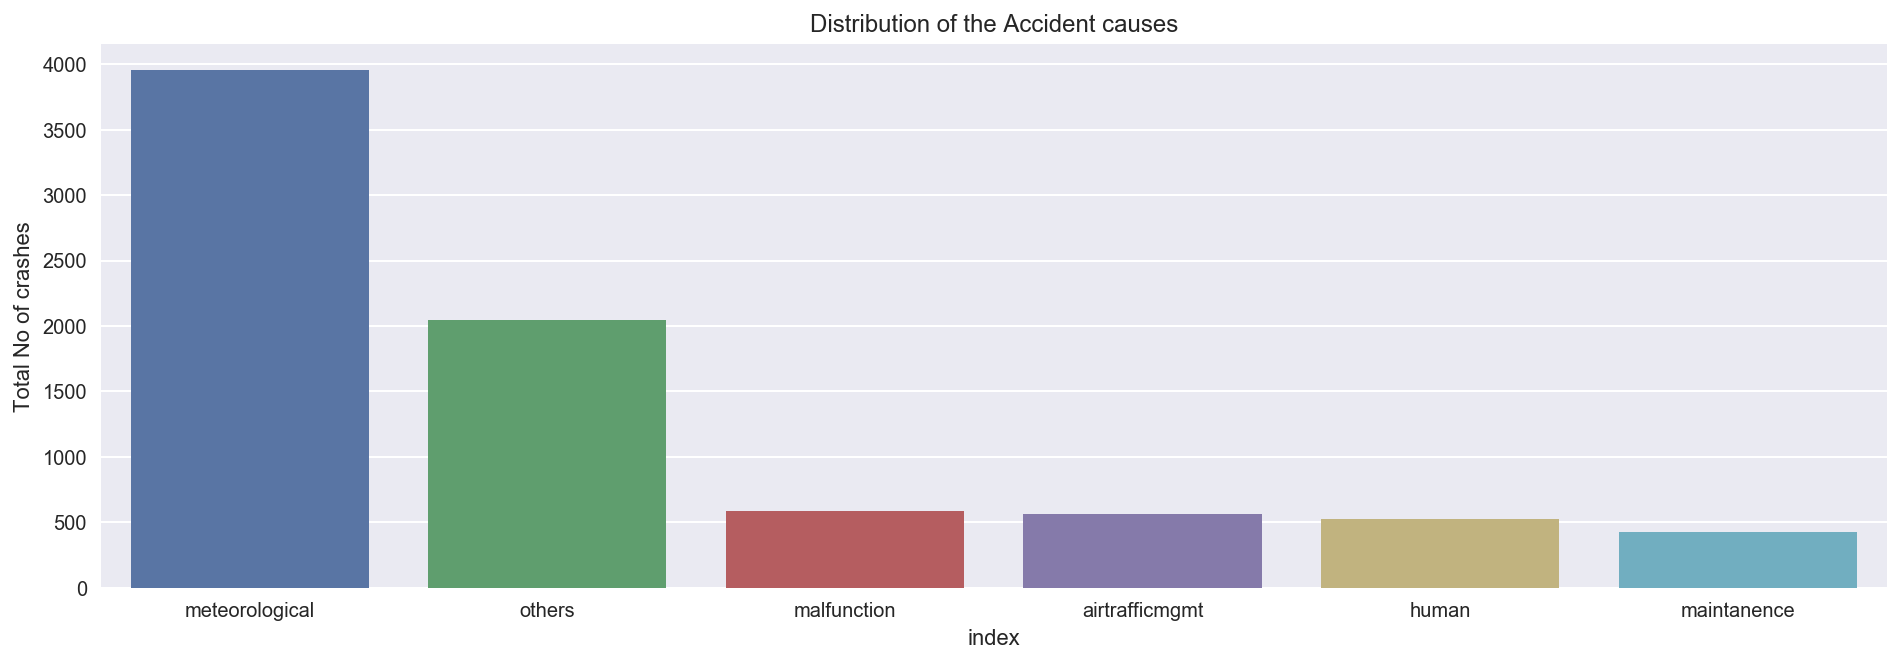

In [7]:
# Function to preprocess a text
# Remove the nouns, give out a lost of words
def clean_summary(narrative_text):
#     print(narrative_text)
    summary = TextBlob(narrative_text)
    return(' '.join(list(summary.words)))
    #summary_noun = TextBlob(" ".join(summary.noun_phrases)).words
    #return (' '.join(list(summary_noun)))

# Dictionary of the categories and the training text
categories_train = {'human' : 'flight crew, cabin crew, passengers, ground crew, air traffic controllers, maintenance crews, and others because of confusion, fatigue, inadequate coordination, poor communications, terrorist acts',
              'malfunction' : 'airfield obstacles, inadequate braking because of runway contamination or other reasons, poor lighting, inadequate signage, problems with landing or navigational aids, malfunctions of air traffic control equipment, inadequate emergency crash/fire/rescue equipment', 
              'maintanence' : 'depressurization, emergency descent, fuselage shell opening, warning indications, uncommanded actuation of aircraft systems or controls, oxygen system problems, hazardous cargo, rotating machinery failure, multiple failures, air conditioning and pressurization problems, pneumatic system malfunctions, hydraulic system malfunctions, electrical system malfunctions, fuel system problems, exceeding ''g'' limits, separation of parts in flight, fluid seepage and spills, blue ice, jettisoning of fuel, leakage of fluids from cargo, loose cargo, improper activation of fire extinguishers, malfunctions of items on the minimum equipment list, electrical systems, flammable fluids, cargo, auxiliary power unit, or other system', 
              'meteorological' : 'ice ,turbulence, lightning strike, static discharge, clouds, winds, tailwinds, headwinds, crosswinds, thunderstorms, wind shear, microbursts, fog, haze, rain, heavy rain, freezing rain, snow, slush, hail, mountain, weather, volcanic ash, birds', 
              'airtrafficmgmt' : 'unscheduled landings, gear-up landings, excursions off the end or side of the runway, brake malfunctions or difficulties, goarounds, short landings, long landings, overweight landings, hard landings, problems from contaminated runways, using the wrong runway, ditching, loss of directional control, or runway contact by nacelle, wing, tail, or fuselage.',
              'others' : 'Landing gear and brake problems include collapse of the landing gear, tire failure, wheel failure, brake failure, asymmetric braking, main landing gear up or unlocked, nose landing gear up or unlocked, false gear indication, antiskid system failure, steering failure, strut failure, emergency extension (gear free-fall), asymmetric gear extension, and tire damage by foreign objects. Thrust problems include in-flight engine shutdowns, failure or asymmetric deployment of thrust reversers, inadvertent thrust reverser deployment in flight or on the ground, engine flameout, engine failure that is not contained by the engine case and/or the nacelle, engine fire warning, engine separation, high exhaust gas temperature, engine stab or surge, engine power loss, multiple engine failure, foreign object damage to engine, engine overspeed, and abnormalities involving the oil system, throttles, gear box, or fuel. Flight control problems include gross weight and center-of-gravity problems, jammed or locked controls, aircraft stall, instrument error or false indications, wake turbulence, buffet, or vibrations caused by structural failures, improper actions by the pilot or autopilot, uncommanded actuation of control surfaces, adverse weather, or other system cause.'              
             }

for key, value in categories_train.items():
    categories_train.update({key:clean_summary(value)})

    
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier

# 0. Set the training data
X_train = [value for key, value in categories_train.items()]
y_train = [key for key, value in categories_train.items()]

# 1. Set the testing data
X_test = data['Narrative']

# 2. Create a pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42))
                    ])

# 3. Train the model
text_clf = text_clf.fit(X_train, y_train)
print(text_clf)

# 4. Test the model/ Fit the model on the test set
y_pred_class = text_clf.predict(X_test)
    
# assign the labels to the dataframe
data['label'] = y_pred_class

# Display the classifications for the text
data[['Narrative', 'label']].head()

# Plot the distribution of causes as per the classification model
data_op = data['label'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)

sns.set(style="darkgrid")
fig = plt.figure(figsize=(16,5))

ax = sns.barplot(x = 'index', y='label', data=data_op, estimator = np.sum)
plt.title('Distribution of the Accident causes')
plt.ylabel('Total No of crashes')
fig.savefig('./assets/gen_plots/1_cause_vs_crash', bbox_inches='tight')
plt.show()

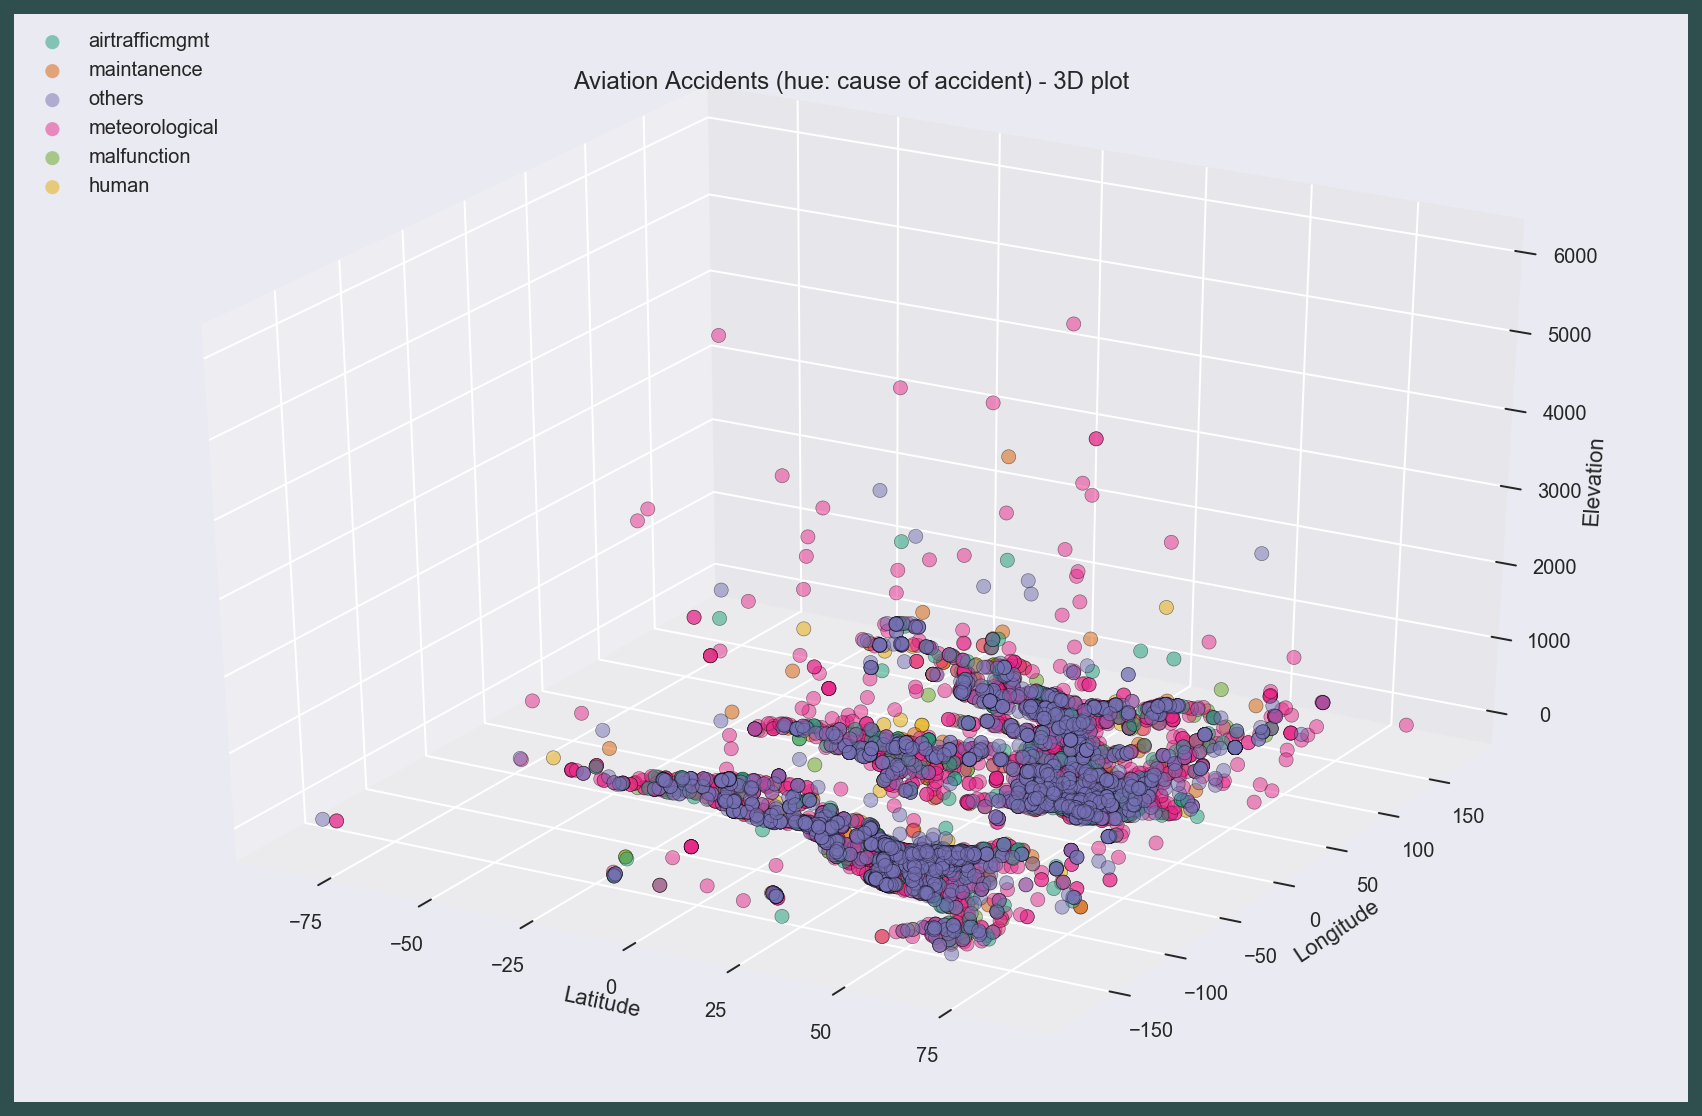

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from matplotlib import markers

x = data['orig_latitude']
y = data['orig_longitude']
z = data['Crash_Elev_m']
colors = ("red", "green", "blue", "yellow", "black", "orange")
groups = data['label'].unique()

m_styles = markers.MarkerStyle.markers
N = 7
colormap = plt.cm.Dark2.colors
# Create plot
fig = plt.figure(figsize=(15, 10), facecolor='darkslategray')
ax = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Elevation')
for (marker, color), group in zip(itertools.product(m_styles, colormap), groups):
    x = data.ix[data['label'] == group, 'orig_latitude']
    y = data.ix[data['label'] == group, 'orig_longitude']
    z = data.ix[data['label'] == group, 'Crash_Elev_m']
    ax.scatter(x, y, z, alpha=0.5, c=color, marker = 'o', edgecolors='none', s=50, label=group)

plt.title('Aviation Accidents (hue: cause of accident) - 3D plot')
plt.legend(loc=2)
plt.show()
fig.savefig('./assets/gen_plots/1_3Dplotlabel', bbox_inches='tight')

# 9. Locations with high density of crashes<a id='clustering'></a>
[Go Back to table of contents](#toc)


**Are aircrashes individual incidents? I am interested to check if there has been an area, where incidents have occured consistently over the years. This is a usecase for clustering, since we have datapoints wrt latitude, longitude and we are interested in closely located points that form a cluster.**

To start, I will take a subset of the dataset. I tried doing clusters with the full dataset, but I realized it is much easier to start with a subset. But, to test my concept, I decided to go with an area  with more developing countries and an added bonus would be if I am familiar with the location - ASIA :)

- Continent -  Asia
- Nature of flights - All except Military

Clustering Technique used
- DBScan algorithm which uses haversine distance ( The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes)

Clustering parameters
- Distance between Accident locations  - 1 km
- Convert the distance into radians before setting the eps value for DBScan clustering.
- Minimum number of incidents to have occured in that area -  20


The detailed notebook can be found in this link: [Clustering crashes to find high density areas](./3. Locations with high density of crashes - Clustering.ipynb)

In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

import seaborn as sns
import matplotlib.pyplot as plt

##### Read CSV
data = pd.read_csv('./dataset/outputof1.csv')

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##### Get the data
data1 = data[data['Continents'] == 'Asia']
data1 = data1[data1['Nature_Code'] != 'Military']

X = data1[['orig_latitude', 'orig_longitude']]

##### Scale the data
Xs = StandardScaler().fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

min_dist = 1 
eps_radians = min_dist/6371


##### Perform DBScan Clustering
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps = eps_radians, min_samples = 20, algorithm='ball_tree',metric="haversine")
dbscan.fit(np.radians(Xs))

labels = dbscan.labels_  
Xs['dbscan_label'] = labels
X['dbscan_label'] = labels
# Calculate Silhouette to check how the clusters are separated from each other. 
# Adjust the epsilon and min samples accordingly
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscan.core_sample_indices_] = True 
# print(np.unique(labels))

# Plot the clusters
unique_labels = np.unique(labels)
print('Number of clusters found in Asia, where accidents have occured within a distance of 1 km. (-1 denotes the points that were not included in the cluster)')
print(X.dbscan_label.value_counts())

# Assign the label to the dataframe
data1['dbscan_label'] = labels
data1_Asia_Cluster = data1[data1['dbscan_label'] == 0]
# Plot cluster 0
# import folium

# #create a map
# this_map = folium.Map(prefer_canvas=True)

# def plotDot(point):
#     '''input: series that contains a numeric named latitude and a numeric named longitude
#     this function creates a CircleMarker and adds it to your this_map'''
#     if(point.dbscan_label == 0):
#         folium.CircleMarker(location=[point.orig_latitude,point.orig_longitude],
#                             popup=str(point.Year),
#                             fill_color='#000000',
#                             radius=5,
#                             weight=10).add_to(this_map)

# #use df.apply(,axis=1) to "iterate" through every row in dataframe
# data1_Asia_Cluster.apply(plotDot, axis = 1)
# # Set the zoom to the maximum possible
# this_map.fit_bounds(this_map.get_bounds())
# #Save the map to an HTML file
# this_map.save('cluster_in_asia.html')
# this_map

Number of clusters found in Asia, where accidents have occured within a distance of 1 km. (-1 denotes the points that were not included in the cluster)
-1    1044
 0      20
Name: dbscan_label, dtype: int64


/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


___
<img src="./assets/images/delhi.png"/>
___

# Further analysing the cluster of accidents that have occured at similar locations 

In [10]:
data1_Asia_Cluster[['Year', 'Time', 'Phase', 'Operator', 'Type_Code', 'Engine_Type', 'Total_Fatal', 'label', 'Seasons', 'Narrative']]

,Year,Time,Phase,Operator,Type_Code,Engine_Type,Total_Fatal,label,Seasons,Narrative
35,1936,22:00,Standing (STD),Imperial Airways,Others,Unknown,0,malfunction,Autumn,Destroyed in hangar fire.
1090,2002,03:15,Taxi (TXI),Indian Airlines,Airbus,General Electric,0,others,Spring,A maintenance crew prepared the aircraft to ta...
1512,2006,08:00,Landing (LDG),Valan International Cargo Charter,Antonov,Ivchenko,0,others,Spring,During the descent one engine flamed out due t...
2003,2009,16:00,En route (ENR),IndiGo Airlines,Airbus,IAE,0,malfunction,Winter,"At 17.15, the pilot of the Indigo flight 664 r..."
2732,1983,20:20,Standing (STD),Indian Airlines,Airbus,General Electric,0,meteorological,Winter,"Air-India Flight 306, a Boeing 747-200B regist..."
2733,1983,20:20,Taxi (TXI),Air-India,Boeing,Pratt & Whitney,0,meteorological,Winter,"Air-India Flight 306, a Boeing 747-200B regist..."
3066,1988,17:26,Landing (LDG),Indian Airlines,Boeing,Pratt & Whitney,0,others,Summer,Indian Airlines flight IC422 was a domestic se...
3292,1990,09:17,Landing (LDG),Air-India,Boeing,Pratt & Whitney,0,others,Spring,"The Boeing 747, named ""Emperor Vikramaditya"", ..."
3670,1994,14:54,Standing (STD),Aeroflot,Ilyushin,Kuznetsov,4,airtrafficmgmt,Spring,"A Sahara India Airlines Boeing 737, VT-SIA, wa..."
3672,1994,14:54,Takeoff (TOF),Sahara Airlines,Boeing,Pratt & Whitney,4,airtrafficmgmt,Spring,"A Sahara India Airlines Boeing 737, VT-SIA, wa..."


# Word cloud of Incident Summary at this location

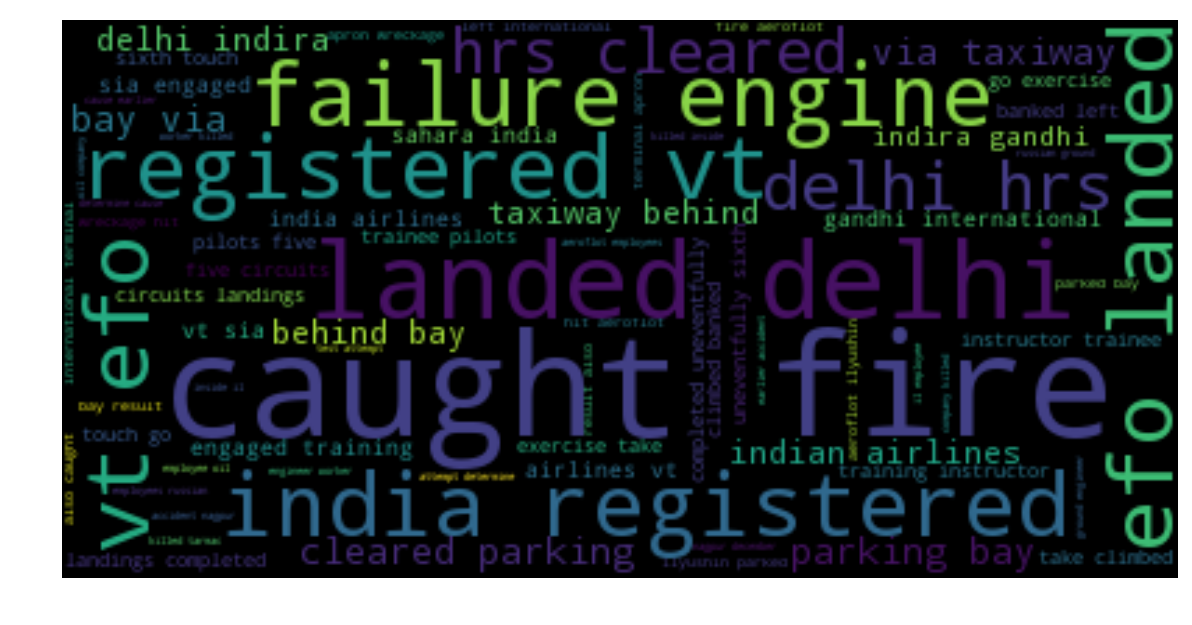

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# We can use the TfidfVectorizer to find ngrams for us
vect = TfidfVectorizer(ngram_range=(2,2), stop_words=stop)

# Pulls all of the Narratives into one giant string
summaries = "".join(data1_Asia_Cluster['Narrative'])
ngrams_summaries = vect.build_analyzer()(summaries)

text = Counter(ngrams_summaries).most_common(4000)

# Convert the text data to dictionary to be used by wordcloud
d = {}
for t, count in text:
    d[t] = count

from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# fig.savefig('./gen_plots/delhi_ngram.png', bbox_inches='tight')


# from os import path
# from wordcloud import WordCloud, STOPWORDS, ImageCsolorGenerator
# from PIL import Image
# import matplotlib.pyplot as plt
# p = path.dirname('./assets/images/')

# plane_colours = np.array(Image.open(path.join(p, "cloud.jpg")))
# image_colors = ImageColorGenerator(plane_colours)

# wc = WordCloud(font_path = './assets/fonts/Helvetica-Bold.ttf', background_color="black", max_words=4000, mask=plane_colours,
#                stopwords=stopwords, max_font_size=100, random_state=40, scale = 3, relative_scaling=1)
# # generate word cloud
# wc.generate_from_frequencies(frequencies=d)

# fig = plt.figure(figsize=(10,10))
# # plt.imshow(wc, interpolation="bilinear")
# plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis("off")
# plt.show()

# fig.savefig('./assets/gen_plots/delhi_ngram.png', bbox_inches='tight')

In [95]:
pd.set_option('display.max_colwidth', -1)
for text in data1_Asia_Cluster['Narrative']:
    print('\n', text)


 Destroyed in hangar fire.

 A maintenance crew prepared the aircraft to taxi. After engine start up both engines went to flight idle because someone inadvertently pulled the flight idle circuit breaker. The A.300 jumped the chocks and headed for the Airport Repairs Cargo hangar. Since the engines were in flight idle braking and nosewheel steering did not work. The maintenance crew tried to reduce power on engine number and failing in that, increased power to 90% on the number 2 engine. 

 During the descent one engine flamed out due to a failure in the engine control system. The crew carried out a forced landing on an unpaved airfield.

 At 17.15, the pilot of the Indigo flight 664 reported to Air Traffic Control that there were a couple of passengers who were behaving aggressively and threatening to hijack the plane. The plane was given priority and it landed at 17.29. The plane was taken to an isolated area of the Delhi Airport and was cordoned off by the National Security Guard (N

## What is the trend over the years at this location?

1. Accidents were at its peak during thr 1980s and 1990s.
2. Indian Airlines, AirIndia flights were involved 10 out of the 20 times
3. The aircraft manufacturer with most no of accidents int his area is Boeing/Douglas.
4. The engine manfacturer for both Being and Douglas flights were Pratt and Whitney
5. Most of the incidents were at  Landing, Approach or Taxi phase. Which means, it is near the airport. The airtraffic managament would be a factor to probe into. I further checked the incidents near this region. The runway seems to be a common word in these incidents. For further studies, the runway charachteristics like length, surface could be good features in the dataset

## Any interesting facts?

1. **8 March 1994 - Collision between Sahara Indian Airlines and Ilyushin 86** 
    - A Sahara India Airlines Boeing 737, VT-SIA, was engaged in a training flight with an instructor and 3 trainee pilots. Five circuits and landings were completed uneventfully. During the sixth touch-and-go exercise, after the take off from runway 28, the aircraft had climbed to 400-500 feet when it banked left and crashed at the International Terminal Apron. The wreckage of aircraft hit an Aeroflot Ilyushin 86 aircraft parked on Bay No. 45 as a result of which it also caught fire. Two Aeroflot employees, a Russian ground engineer and an airport worker were killed inside the Il-86. One employee of an airport oil company was killed on the tarmac.
    - The Ilyushin 86, RA-86119, had made an unscheduled diversion to Delhi due to technical problems. The airplane had been repaired and fully fuelled (52 tons).
2. **28 January 1983 - Collision between AirIndia and Indian Airlines flight** - 
    - Air-India Flight 306, a Boeing 747-200B registered VT-EFO, landed at Delhi Airport at 20:10 hrs and was cleared for parking on bay No 17 via taxiway C (behind bay No 12).
Earlier, Indian Airlines Airbus A300 VT-EFV had landed and was parked at bay No 12 . To rectify a radar snag, the Airbus was positioned facing west, opposite to its normal parking position. After rectification, while the Airbus was being manoeuvred to its initial position, it got stuck 90 ft behind the marked parking position thereby forming an obstruction to aircraft taxying on taxiway C. The Boeing 747 aircraft on its way to bay No 17 hit the tail portion of the stationary Airbus. Both aircraft sustained substantial damage.

    - The cause of collision was failure on the part of the Indian Airlines to inform ATC and IAAI when their aircraft was forming an obstruction to the aircraft taxying on C taxiway and failure of the pilot-in-command of Air India Boeing 747 to exercise caution during taxying even when signaled to deviate from centreline of C taxiway.
The contributory factor was lack of co-ordination between and within the concerned agencies which are required to ensure safe movement of the aircraft at the airport.

Considering the fact that this is a sparse dataset, 2 similar kinds of incidents at the same location is something that we should be concerned about. Specially, since both were due to negligence of air traffic management. 

I was a curious about the current performance inthis area. Further I want to check the incidents in that area in the last 10 years. I tried reading up about the Airport and was glad I found this piece of information!


# News from 2016 - I was glad to read this up! This shows that the air traffic management has become better when compared to few decades ago.
http://timesofindia.indiatimes.com/india/indigo-and-spicejet-flights-avert-collision-at-delhi-airport/articleshow/56195815.cms
- A major mishap was averted at Indira Gandhi International Airport when an Indigo flight 6E 769 and a Spice Jet flight SG 123 came face-to-face on the runway. However, no damage occurred as it was promptly flagged. The Spice Jet flight was following ATC instructions. While taxing, the Spice Jet crew observed another aircraft in the opposite direction.

# 10. Summary<a id='summary'></a>
[Go Back to table of contents](#toc)



Studying the past aviation accidents in this project, investigating the safety aspect of the aviation industry was my aim. The studies that occur in this area are huge and with my project I was keen on uing data science techniques to answer safety related questions. We always think aviation accidents are isolated incidents, but I wanted to look closely if there is a pattern in them.

During the phase of the project I realised the enormous amounts of research that happens in this area to increase safety. One of the major studies that have been occuring in this area is the Natural language processing of the cockpit conversations, communication with the air stations, transcripts from black box etc. With the increase in technology namely natural language processing and Machine learning, the analysis of these kind of unstructured information is becoming easier.

The following features were available in my dataset that was scraped from aviation-saefty website: 
   -  Aircraft manufacturer(boeing/douglas ect), airline operator(united airline, indian airline, emorates/quantas etc), accident location(Sublocation/Country), Departure and destination airport, date of accident(day, month, year, time), nature of flight(military/commercial/cargo/ambulane/agricultural),Occupants and fatalities count(passenger/crew/ground), engine type and count, age of airline at the time of crash. 
   - The focus of the dataset was parameters that were recorded whent he incident occured rather than focusing ont he features that caused the accident like weather condition, time into the flight that accident occurred etc. In order to improve the models, more data would be required.

Aviation industry is definitely getting better over the years. Considering the fact that it is also becoming a common mode of transport unlike the luxury it used to be, the safety standards can never be enough for the improvements to stop. The trend in the accidents and the number of fatalities over the years clearly shows a decline in fatalities. Which is a good sign cinsidering th efact that air travel is very affordable and common inthis connected world.

The challenge that I overcame with this dataset are:
- Dealing with a real world data that had missing values and widespread information. Cleaning the data and extracting the required information was a major task of this project. 
- The aircraft accident locations was textual information which had to be converted to latitude longitude. The texts were not perfect so it required iteratively trying to catch errors and fixing it. At time the location was provided as "10 km West of the xyz airport". This information when provided to google geocoder api throws an error. So these had to be checked ona case basis mostly. But I was able to come up with regualr expressions that would mostly get many of the same kind out of the way.
- Learning and implementing the NLP topic modelling and text models were quite challenging and interesting. Implementing the concepts and libraries for Preprocessing text, stemming, lemmatizing, document vectorizer etc was a good path to follow in this project.
- Implementing clustering for the purpose of zeroing down on accident prone locations was interesting for me. This helped me go through various clustering mdoels and choosing the final model.

**Problem Statement 1: A question I wanted to know and which was not present in my dataset was the major contributor to the aviation accidents.**
- I used NLP and machine learning models to go through the accident summary and extract the topic from it.
- I trained my machine learning model to categorize the causes into human error, meteorological error, malfunction, maintenance issues, airtraffic management and others categories. 
- The meteorological errors that contributed were a clear winner. The main words that contributed to this category are: *ice ,turbulence, lightning strike, static discharge, clouds, winds, tailwinds, headwinds, crosswinds, thunderstorms, wind shear, microbursts, fog, haze, rain, heavy rain, freezing rain, snow, slush, hail, mountain, weather, volcanic ash, birds*
    
- **Recommendation for Aviation Safety authorities:**
        - Focusing on learning from the past accidents is a crucial step to improving and implemeting safety measures. There is a considerable improvement seen with the reducing number of accidents over the years, but the meteorological errors and pilot errors still top the list given any year. I suggest actions need to be taken to be able to improve such that these figures come down and increasing safety.

- **Further steps:**
        - Exploring further into this topic, collecting more data such as information on the trainings provided to the pilot under those conditions, the weather condition on that particular day etc would be able to provide more perspective to the causes and provide further insights that will expose areas of concern and lead to improving aviation safety.
        
**Problem Statement 2: With my plan of looking for accident patterns, I was interested to find areas that are accident prone.**

- I started analysing the density of crashes > 20 within a 1 km distance, the clustering results provided were quite good in boiling down to the area around Delhi airport that had a history of more than one flight collisions. Further studying it I realized it was mainly the air traffic management that was a major cause.

- DBScan clustering model was found more useful for this purpose as the latitude longitude is a main feature from my dataset. It can be used to zero down on other locations to find root causes of issues that occur in certain areas. This was a good example to showcase the positives of this technique. 

- By changing the location parameters of my algorithm, it would be possible to find more accident prone areas. Accidents are not always an isolated incident. Conducting proper study about past accidents and being able to avoid atleast one incident in the future would be a **success metric**.

- **Recommendation for Aviation Safety authorities:**
        - Air Traffic management issues at/near the airports and runways are a major factor for such accidents. These are mainly human caused errors. It could be a communciation issue or management issue , maybe because it is understaffed with well trained staff. The air traffic managemtn issues at delhi airport is an example showing patters that could occur around the world. 
        - Improve the safety regulations to address air traffic management issues that caused past incidents.
        - A news from a 2016 incident at delhi airport shows that they successfully averted a collision in the runway.
        - I appreciate the improvement and hope that this continues and is applied to other locations too.

- **Further steps:**
        - Air Traffic management issues at/near the airports and runways are a major factor for such accidents. These are mainly human caused errors. It could be a communciation/management issue or could be because of understaffing/less  trained staff to handle situations. Datasets with information on the air port staff and condirion on the accident day can contribute to exposing errors in that area and handling them to incerase aviation safety.
        